In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Parâmetros
sampleRate = 100e3     # Taxa de amostragem em Hz
duration = 0.03         # Duração do sinal em segundos
f_mod = 60              # Frequência da modulante em Hz
m_mod = 0.1             # Indice Modulacao
f_car = 3e3             # Frequência da primeira portadora em Hz

In [62]:
# Gerar o vetor de tempo
t = np.linspace(0, duration, int(sampleRate * duration), endpoint=False)

# Gerar o sinal da modulante
modulante = m_mod * np.sin(2 * np.pi * f_mod * t)

# Função para gerar uma onda triangular
def triangular_wave(t, freq, amplitude=1.0):
    """ Gera uma onda triangular com uma dada frequência e amplitude. """
    period = 1 / freq
    return amplitude * (2 * np.abs(2 * ((t / period) % 1) - 1) - 1)

# Gerar os sinais das portadoras triangulares com deslocamento de nível
posCarrier = 0.5 * triangular_wave(t, f_car) + 0.5
negCarrier = 0.5 * triangular_wave(t, f_car) - 0.5

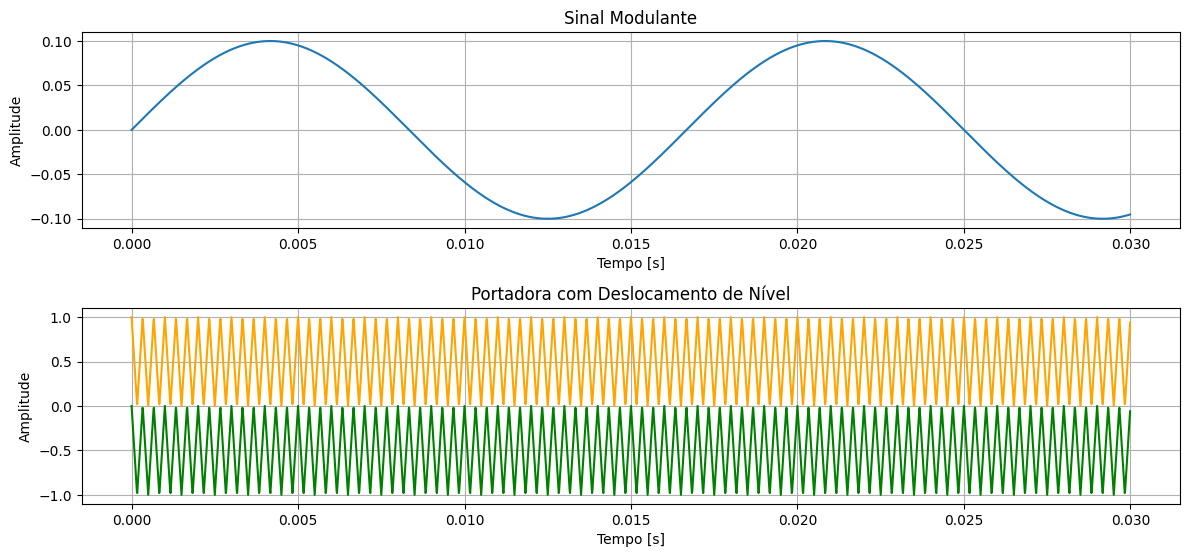

In [63]:
# Plotar os sinais
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, modulante, label='Sinal Modulante')  # Apenas os primeiros 1000 pontos para visualização
plt.title('Sinal Modulante')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, posCarrier, label='Portadora com Deslocamento de Nível', color='orange')
plt.plot(t, negCarrier, label='Portadora com Deslocamento de Nível', color='green')
plt.title('Portadora com Deslocamento de Nível')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [64]:
# Gerar comandos das chaves
S1 = (modulante > posCarrier).astype(int)
S2 = (modulante < negCarrier).astype(int)
S3 = 1 - S1  # Inverso de S1
S4 = 1 - S2  # Inverso de S2

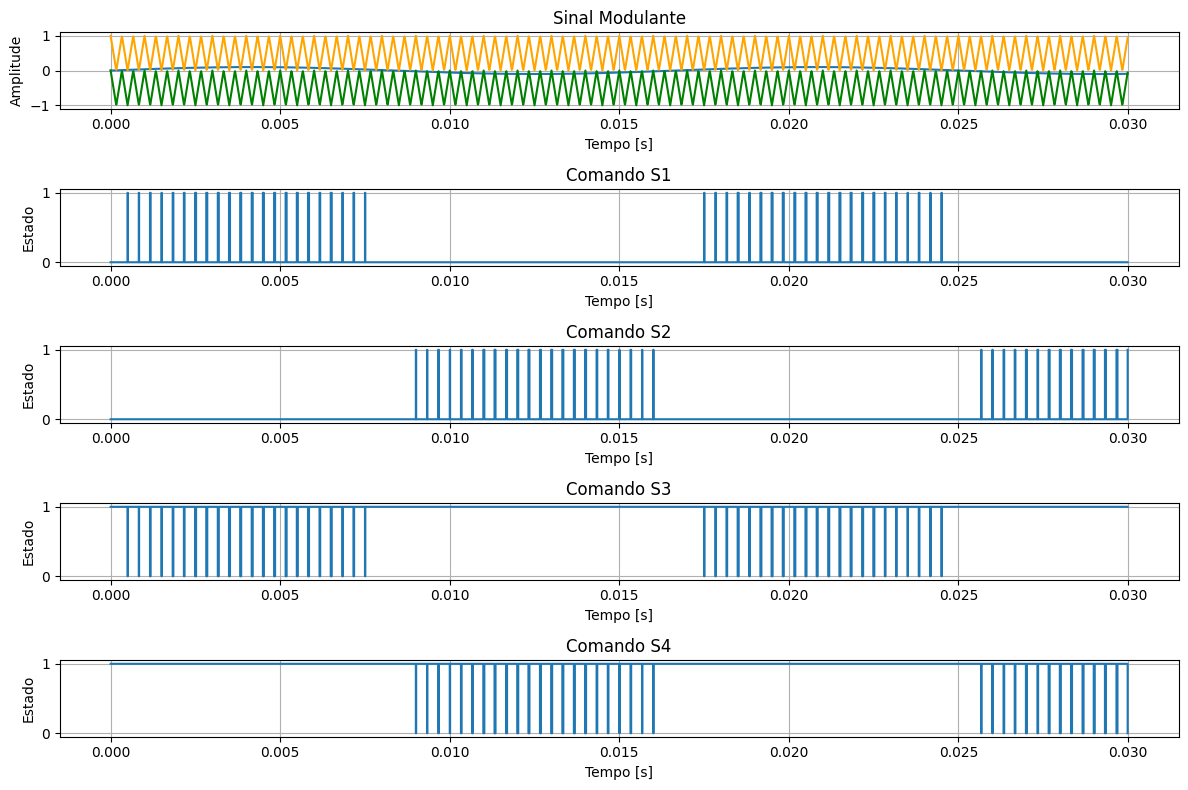

In [65]:
# Plotar os sinais e comandos
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(t, modulante, label='Sinal Modulante')
plt.plot(t, posCarrier, label='Portadora Positiva', color='orange')
plt.plot(t, negCarrier, label='Portadora Negativa', color='green')
plt.title('Sinal Modulante')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(5, 1, 2)
plt.step(t, S1, label='Comando S1', where='post')
plt.title('Comando S1')
plt.xlabel('Tempo [s]')
plt.ylabel('Estado')
plt.grid(True)

plt.subplot(5, 1, 3)
plt.step(t, S2, label='Comando S2', where='post')
plt.title('Comando S2')
plt.xlabel('Tempo [s]')
plt.ylabel('Estado')
plt.grid(True)

plt.subplot(5, 1, 4)
plt.step(t, S3, label='Comando S3', where='post')
plt.title('Comando S3')
plt.xlabel('Tempo [s]')
plt.ylabel('Estado')
plt.grid(True)

plt.subplot(5, 1, 5)
plt.step(t, S4, label='Comando S4', where='post')
plt.title('Comando S4')
plt.xlabel('Tempo [s]')
plt.ylabel('Estado')
plt.grid(True)

plt.tight_layout()
plt.show()

In [66]:
# Criar um DataFrame com os dados
data = {
    'S1': S1,
    'S2': S2,
    'S3': S3,
    'S4': S4
}
df = pd.DataFrame(data)

# Salvar o DataFrame em um arquivo txt com espaços como delimitadores
df.to_csv('NPC_PWM.txt', sep=' ', index=False, header=False)